# Set-up example

In [1]:
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random 
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import statsmodels.stats.power
from sklearn.utils import resample
from tqdm.notebook import trange

In [2]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 1. Statistical Estimations

## 1.1 Estimates of location

In [3]:
[np.mean(df.x), 
 np.average(df.x, weights = df.carat), 
 np.median(df.x), 
 sp.trim_mean(df.x, 0.1)]

[5.731157211716722, 6.380923712740938, 5.7, 5.660075778642937]

## 1.2 Estimates of variability

In [4]:
[np.std(df.x),
 np.quantile(df.x, 0.25)]

[1.1217503485171316, 4.71]

# 2. Correlation

## 2.1 Correlation plot

In [5]:
df[['x','y','z']].corr()

,x,y,z
x,1.000000,0.974701,0.970772
y,0.974701,1.000000,0.952006
z,0.970772,0.952006,1.000000


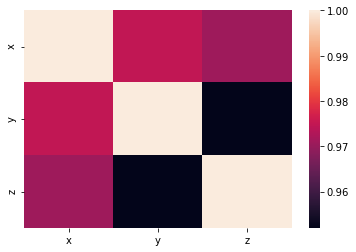

In [6]:
sns.heatmap(df[['x','y','z']].corr())

# 3. Sampling 

In [7]:
df.sample(n = 100)

,carat,cut,color,clarity,depth,table,price,x,y,z
47212,0.59,Ideal,E,VS2,62.2,58.0,1838,5.35,5.39,3.34
10220,1.01,Very Good,H,SI1,62.7,58.0,4743,6.36,6.34,3.98
28195,0.38,Premium,G,SI1,60.0,60.0,666,4.65,4.72,2.81
15211,1.01,Ideal,G,VS2,61.9,55.0,6108,6.49,6.46,4.01
24899,1.58,Premium,D,SI1,60.2,58.0,13329,7.60,7.46,4.56
...,...,...,...,...,...,...,...,...,...,...
14675,1.21,Very Good,D,SI2,60.9,58.0,5922,6.83,6.89,4.18
17905,1.26,Ideal,G,SI1,61.3,57.0,7230,6.94,6.99,4.27
1147,0.72,Very Good,E,VS2,63.2,58.0,2923,5.67,5.72,3.60
46701,0.55,Ideal,G,VS1,61.3,57.0,1792,5.28,5.25,3.23


In [8]:
df.x.mean()

5.731157211716722

## 3.1 Sampling distribution of statistics

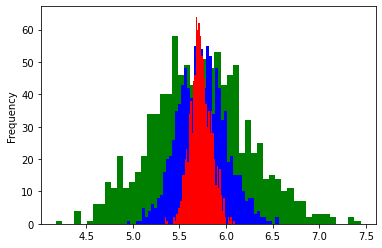

In [9]:
pd.Series([df.x.sample(n = 5).mean() for _ in range(1000)]).plot.hist(bins = 50, color = 'green')
pd.Series([df.x.sample(n = 20).mean() for _ in range(1000)]).plot.hist(bins = 50, color = 'blue')
pd.Series([df.x.sample(n = 100).mean() for _ in range(1000)]).plot.hist(bins = 50, color = 'red')

## 3.2 Standard error 

In [10]:
sp.sem(df.x)

0.0048299737209106675

# 4. Bootstrap

In [11]:
results = []
for _ in trange(1000):
    sample = resample(df.x)
    results.append(sample.median())
    
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {df.x.median()}')
print(f'bias: {results.mean() - df.x.median()}')
print(f'std.error: {results.std()}')
print(f'95% confidence interval: {results.quantile(0.025)} ~ {results.quantile(1 - 0.025)}')


Bootstrap Statistics:
original: 5.7
bias: -0.0037599999999997635
std.error: 0.005660781257427569
95% confidence interval: 5.69 ~ 5.71


# 5. Distributions

## 5.1 Normal distribution

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

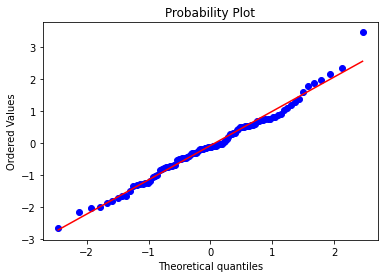

In [12]:
norm_sample = sp.norm.rvs(size = 100)
sp.probplot(norm_sample, plot = plt)

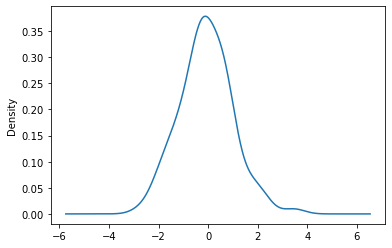

In [13]:
pd.Series(norm_sample).plot.density()

## 5.2 Long-tailed distribution

## 5.3 Student's t-distribution

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

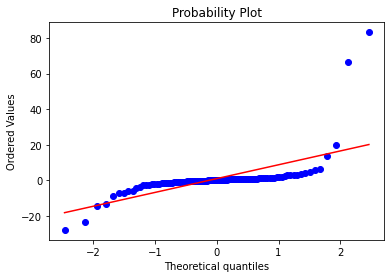

In [14]:
t_sample = sp.t.rvs(df = 1, size = 100)
sp.probplot(t_sample, plot = plt)

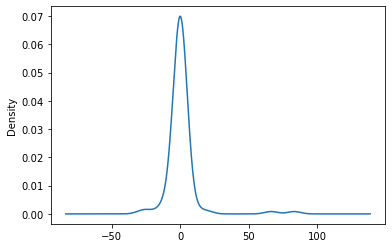

In [15]:
pd.Series(t_sample).plot.density()

## 5.4 Binomial distribution

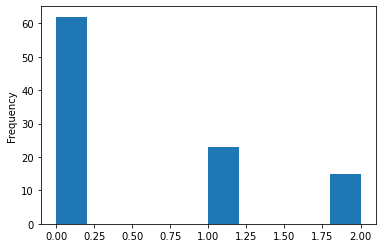

In [16]:
binomial_sample = sp.binom.rvs(n = 5, p = 0.1, size = 100)
pd.Series(binomial_sample).plot.hist()

In [17]:
sp.binom.pmf(k = 2, n = 5, p = 0.1)

0.0729

In [18]:
sp.binom.cdf(k = 2, n = 5, p = 0.1)

0.99144

## 5.5 Chi-square distribution

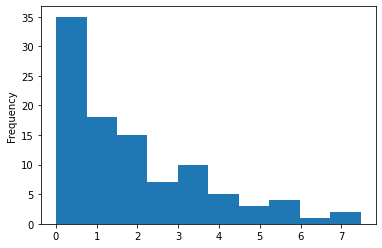

In [19]:
chi2_sample = sp.chi2.rvs(df = 2, size = 100)
pd.Series(chi2_sample).plot.hist()

## 5.6 F-distribution

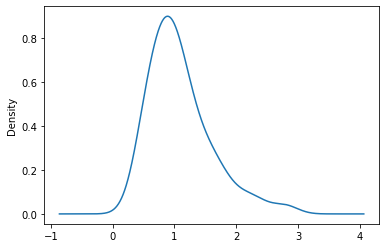

In [20]:
f_sample = sp.f.rvs(dfn = 20, dfd = 20, size = 100)
pd.Series(f_sample).plot.density()

## 5.7 Poisson distributions

### Poisson

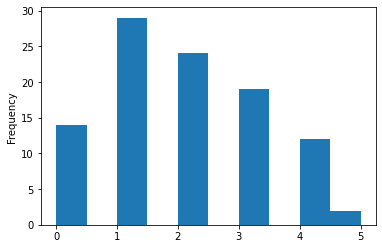

In [21]:
poisson_sample = sp.poisson.rvs(mu = 2, size = 100)
pd.Series(poisson_sample).plot.hist()

### Exponential

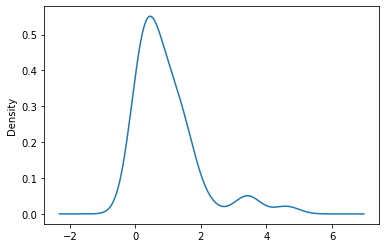

In [22]:
expon_sample = sp.expon.rvs(size = 100)
pd.Series(expon_sample).plot.density()

### Weibull

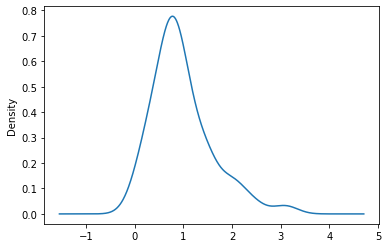

In [23]:
weibull_sample = sp.weibull_min.rvs(c = 1.5, size = 100)
pd.Series(weibull_sample).plot.density()

# 6. Statistical Experiments and Significance Testing

https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f

## 6.1 Hypothesis tests

## 6.2 Resampling

### Permutation

In [24]:
df = pd.DataFrame(
    {'Page':['Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page A', 'Page A', 'Page A', 'Page A', 'Page A'],
    'Time':[0.21, 2.53, 0.35, 0.71, 0.67, 0.85, 2.11, 2.46, 1.32, 1.49, 0.68,
            0.75, 3.21, 3.33, 1.47, 1.87, 0.95, 1.26, 0.45, 0.48, 1.18, 1.47,
            3.42, 3.57, 1.97, 2.23, 0.39, 0.43, 0.65, 0.87, 1.73, 0.74, 0.86,
            1.18, 2.06, 0.93]})
df

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [25]:
df.Page.value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

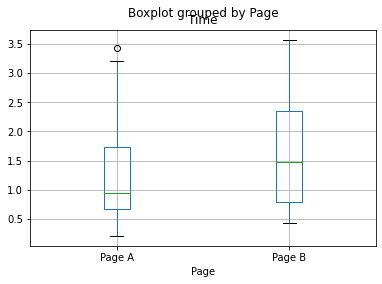

In [26]:
df.boxplot(by = 'Page', column = 'Time')

In [27]:
mean_a = df[df.Page == 'Page A'].Time.mean()
mean_b = df[df.Page == 'Page B'].Time.mean()
mean_a, mean_b

(1.2633333333333332, 1.62)

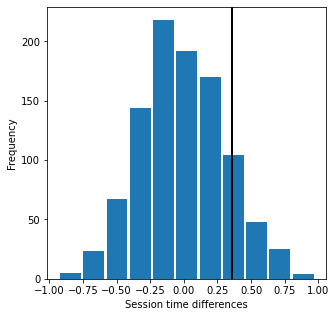

In [28]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(population = range(n), k = nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = df[df.Page == 'Page A'].shape[0]
nB = df[df.Page == 'Page B'].shape[0]

perm_diffs = [perm_fun(df.Time, nA, nB) for _ in trange(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_b - mean_a, color = 'black', lw = 2)
ax.set_xlabel('Session time differences')
ax.set_ylabel('Frequency')
plt.show()

In [29]:
print(f'p-value: {np.mean(perm_diffs > mean_b - mean_a)}')

p-value: 0.139


## 6.3 Statistical significance and p-values

Outcome | Price A | Price B

Conversion | 200 | 182

No conversion | 23,539 | 22,406

In [30]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
obs_pct_diff

0.03675791182059275

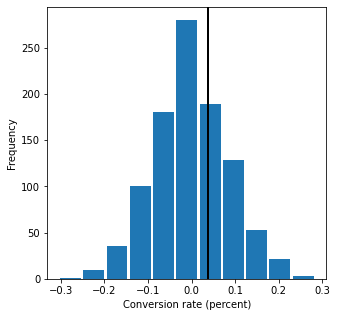

In [31]:
conversion = [0] * 45945
conversion.extend([1] * 382)
df = pd.Series(conversion)

perm_diffs = [100 * perm_fun(df, 23739, 22588) for _ in trange(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = obs_pct_diff, color = 'black', lw = 2)
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')
plt.show()

In [32]:
print(f'p-value: {np.mean(np.array(perm_diffs) > obs_pct_diff)}')

p-value: 0.328


In [33]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = sp.chi2_contingency(survivors)
print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


## 6.4 t-tests

In [34]:
df = pd.DataFrame(
    {'Page':['Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page B', 'Page A', 'Page B', 'Page A', 'Page B',
             'Page A', 'Page A', 'Page A', 'Page A', 'Page A', 'Page A'],
    'Time':[0.21, 2.53, 0.35, 0.71, 0.67, 0.85, 2.11, 2.46, 1.32, 1.49, 0.68,
            0.75, 3.21, 3.33, 1.47, 1.87, 0.95, 1.26, 0.45, 0.48, 1.18, 1.47,
            3.42, 3.57, 1.97, 2.23, 0.39, 0.43, 0.65, 0.87, 1.73, 0.74, 0.86,
            1.18, 2.06, 0.93]})
df

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [35]:
res = sp.ttest_ind(df[df.Page == 'Page A'].Time,
                   df[df.Page == 'Page B'].Time,
                   equal_var = False)
print(f'formula p-value for single sided test: {res.pvalue / 2:.4f}')

formula p-value for single sided test: 0.1408


## 6.5 Multiple testing

## 6.6 Degrees of freedom

## 6.7 ANOVA

In [36]:
df = pd.DataFrame({'Page':['Page 1','Page 2','Page 3','Page 4'] * 5,
                   'Time':[164,178,175,155,172,191,193,166,177,182,171,164,156,185,163,170,195,177,176,168]})
df

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


In [37]:
observed_variance = df.groupby('Page').mean().var()[0]
print(f"Observed means: {df.groupby('Page').mean().values.ravel()}")
print(f'Variance: {observed_variance:.2f}')

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.43


In [38]:
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(df) for _ in trange(3000)]
print(f'Pr(Prob): {np.mean(np.array(perm_variance) > observed_variance):.2f}')


Pr(Prob): 0.07


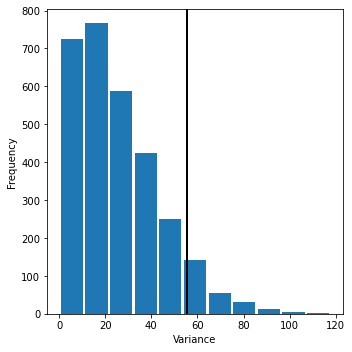

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### F-statistics

In [40]:
model = smf.ols('Time ~ Page', data = df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


### Two-way ANOVA

## 6.8 Chi-square test

In [41]:
df = pd.DataFrame({'Headline':['A','A','B','B','C','C'],
                   'Click':['Click','No-click','Click','No-click','Click','No-click'],
                   'Rate':[14,986,8,992,12,988]})
df

,Headline,Click,Rate
0,A,Click,14
1,A,No-click,986
2,B,Click,8
3,B,No-click,992
4,C,Click,12
5,C,No-click,988


In [42]:
df_pivot = df.pivot(index = 'Click', columns = 'Headline', values = 'Rate')
df_pivot

Headline,A,B,C
Click,,,
Click,14,8,12
No-click,986,992,988


In [43]:
box = [1] * (14+8+12)
box.extend([0] * (986+992+988))
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])
    return np.sum(pearson_residuals)

expected_clicks = (14+8+12) / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(df_pivot.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in trange(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print(f'Observed chi2: {chi2observed:.2f}')
print(f'Resampled p-value: {resampled_p_value:.2f}')


Observed chi2: 1.67
Resampled p-value: 0.51


In [44]:
chisq, p_value, df, expected = sp.chi2_contingency(df_pivot)
print(f'Observed chi2: {chi2observed:.2f}')
print(f'p-value: {p_value:.2f}')

Observed chi2: 1.67
p-value: 0.43


## 6.9 Multi-arm bandit algorithm

## 6.10 Power and sample size

In [45]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
result = sm.stats.TTestIndPower().solve_power(effect_size = effect_size,
                                              alpha = 0.05,
                                              power = 0.8,
                                              alternative = 'larger')
print(f'Sample Size: {result:.2f}')

Sample Size: 116602.39


## 6.11 ExpAn - for experiment analysis

### Generate data

In [46]:
from expan.core.util import generate_random_data

ExpAn core init: v1.4.0


In [47]:
data, metadata = generate_random_data()

In [48]:
data

,entity,variant,normal_same,normal_shifted,feature,normal_shifted_by_feature,treatment_start_time,normal_unequal_variance,date
0,0,A,-1.487862,-0.616148,feature that only has one data point,-1.088533,7,0.003991,2015-01-01
1,1,B,-1.125186,1.783682,has,1.167307,3,-3.565511,2015-01-01
2,2,B,0.388819,1.007539,non,-1.055948,1,6.704536,2015-01-01
3,3,A,-1.173873,-0.889252,non,-0.152459,4,1.209668,2015-01-01
4,4,A,1.112634,0.434377,has,0.175988,4,0.148207,2015-01-01
...,...,...,...,...,...,...,...,...,...
9995,9995,B,-0.028124,0.706185,non,1.270654,5,-17.878939,2016-02-21
9996,9996,B,0.792395,1.829488,non,-1.001675,4,6.321226,2016-02-21
9997,9997,B,0.994518,-1.917363,non,-0.280280,4,-0.474425,2016-02-21
9998,9998,A,-0.697330,0.359386,has,0.800866,7,-0.678204,2016-02-21


In [49]:
metadata

{'primary_KPI': 'normal_shifted',
 'source': 'simulated',
 'experiment': 'random_data_generation'}

### Create experiment

In [50]:
from expan.core.experiment import Experiment

In [51]:
exp = Experiment(metadata = metadata)

### Create statistical test

In [52]:
from expan.core.statistical_test import KPI, Variants, StatisticalTest

In [53]:
kpi = KPI('normal_same')
variants = Variants(variant_column_name = 'variant', control_name = 'B', treatment_name = 'A')
test = StatisticalTest(data = data, kpi = kpi, features = [], variants = variants)

### Analysis

In [54]:
result = exp.analyze_statistical_test(test)
result

INFO:expan.core.experiment:One analysis with kpi '{
    "name": "normal_same"
}', control variant 'B', treatment variant 'A' and features [[]] has just started
INFO:expan.core.experiment:Control group size: 3892
INFO:expan.core.experiment:Treatment group size: 6108
INFO:expan.core.statistics:The distribution of two samples is assumed normal. Performing the sample difference distribution calculation.
INFO:expan.core.statistics:Delta calculation finished!


{
    "result": {
        "confidence_interval": [
            {
                "percentile": 2.5,
                "value": -0.007138761863314601
            },
            {
                "percentile": 97.5,
                "value": 0.0732438406769919
            }
        ],
        "control_statistics": {
            "mean": -0.007833095215783122,
            "sample_size": 3892,
            "variance": 0.991195545472199
        },
        "delta": 0.03305253940683865,
        "p": 0.10698672122297047,
        "statistical_power": 0.36400577293301273,
        "treatment_statistics": {
            "mean": 0.025219444191055533,
            "sample_size": 6108,
            "variance": 1.0046096975922052
        }
    },
    "test": {
        "features": [],
        "kpi": {
            "name": "normal_same"
        },
        "variants": {
            "control_name": "B",
            "treatment_name": "A",
            "variant_column_name": "variant"
        }
    }
}

In [55]:
pd.read_json(result.toJson())

,result,test
confidence_interval,"[{'percentile': 2.5, 'value': -0.0071387618633...",NaN
control_statistics,"{'mean': -0.007833095215783, 'sample_size': 38...",NaN
delta,0.0330525,NaN
p,0.106987,NaN
statistical_power,0.364006,NaN
treatment_statistics,"{'mean': 0.025219444191055002, 'sample_size': ...",NaN
features,NaN,[]
kpi,NaN,{'name': 'normal_same'}
variants,NaN,"{'control_name': 'B', 'treatment_name': 'A', '..."


### Permutation check

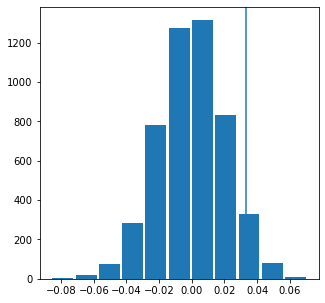

one-side p-value: 0.0518


In [56]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(population = range(n), k = nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_A].mean() - x.loc[idx_B].mean()

mean_B = data[data.variant == 'B'].normal_same.mean()
mean_A = data[data.variant == 'A'].normal_same.mean()

nA = data[data.variant == 'A'].shape[0]
nB = data[data.variant == 'B'].shape[0]

perm_diffs = [perm_fun(data.normal_same, nA, nB) for _ in trange(5000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_A - mean_B)
plt.show()
print(f'one-side p-value: {np.mean(perm_diffs > mean_A - mean_B)}')

### Subgroup analysis

In [57]:
from expan.core.statistical_test import FeatureFilter 

In [58]:
feature = FeatureFilter('feature', 'has')
test = StatisticalTest(data = data, kpi = kpi, features = [feature], variants = variants)

In [59]:
exp.analyze_statistical_test(test)

INFO:expan.core.experiment:One analysis with kpi '{
    "name": "normal_same"
}', control variant 'B', treatment variant 'A' and features [[('feature', 'has')]] has just started
INFO:expan.core.experiment:Control group size: 1966
INFO:expan.core.experiment:Treatment group size: 3067
INFO:expan.core.statistics:The distribution of two samples is assumed normal. Performing the sample difference distribution calculation.
INFO:expan.core.statistics:Delta calculation finished!


{
    "result": {
        "confidence_interval": [
            {
                "percentile": 2.5,
                "value": 0.006671086424345475
            },
            {
                "percentile": 97.5,
                "value": 0.11917967082265521
            }
        ],
        "control_statistics": {
            "mean": -0.03325546053022948,
            "sample_size": 1966,
            "variance": 0.9502823933483748
        },
        "delta": 0.06292537862350035,
        "p": 0.028358778147368372,
        "statistical_power": 0.5922702558935107,
        "treatment_statistics": {
            "mean": 0.02966991809327087,
            "sample_size": 3067,
            "variance": 1.0096351883915924
        }
    },
    "test": {
        "features": [
            {
                "column_name": "feature",
                "column_value": "has"
            }
        ],
        "kpi": {
            "name": "normal_same"
        },
        "variants": {
            "control_name": "

### Statistical test suite

In [60]:
from expan.core.statistical_test import *

In [61]:
kpi = KPI('normal_same')
variants = Variants(variant_column_name = 'variant', control_name = 'B', treatment_name = 'A')

feature_1 = FeatureFilter('feature', 'has')
feature_2 = FeatureFilter('feature', 'non')
feature_3 = FeatureFilter('feature', 'feature that only has one data point')

test_subgroup1 = StatisticalTest(data, kpi, [feature_1], variants)
test_subgroup2 = StatisticalTest(data, kpi, [feature_2], variants)
test_subgroup3 = StatisticalTest(data, kpi, [feature_3], variants)

tests = [test_subgroup1, test_subgroup2, test_subgroup3]
test_suite = StatisticalTestSuite(tests = tests, correction_method = CorrectionMethod.BH)

exp.analyze_statistical_test_suite(test_suite)

INFO:expan.core.experiment:Statistical test suite analysis with 3 tests, testmethod fixed_horizon, correction method CorrectionMethod.BH has just started
INFO:expan.core.experiment:One analysis with kpi '{
    "name": "normal_same"
}', control variant 'B', treatment variant 'A' and features [[('feature', 'has')]] has just started
INFO:expan.core.experiment:Control group size: 1966
INFO:expan.core.experiment:Treatment group size: 3067
INFO:expan.core.statistics:The distribution of two samples is assumed normal. Performing the sample difference distribution calculation.
INFO:expan.core.statistics:Delta calculation finished!
INFO:expan.core.experiment:One analysis with kpi '{
    "name": "normal_same"
}', control variant 'B', treatment variant 'A' and features [[('feature', 'non')]] has just started
INFO:expan.core.experiment:Control group size: 1926
INFO:expan.core.experiment:Treatment group size: 3040
INFO:expan.core.statistics:The distribution of two samples is assumed normal. Performi

{
    "correction_method": "BH",
    "results": [
        {
            "result": {
                "corrected_test_statistics": {
                    "confidence_interval": [
                        {
                            "percentile": 1.25,
                            "value": -0.0014104640151739734
                        },
                        {
                            "percentile": 98.75,
                            "value": 0.1272612212621747
                        }
                    ],
                    "control_statistics": {
                        "mean": -0.03325546053022948,
                        "sample_size": 1966,
                        "variance": 0.9502823933483748
                    },
                    "delta": 0.06292537862350035,
                    "p": 0.028358778147368372,
                    "statistical_power": 0.4808382307266412,
                    "treatment_statistics": {
                        "mean": 0.02966991809327087,
     

### Statistics

In [62]:
import expan.core.statistics

In [63]:
expan.core.statistics.estimate_sample_size(x = data.normal_same, mde = 0.1, r = 0.5, alpha = 0.05, beta = 0.2)

23126555.02628001